In [1]:
%pylab inline
import numpy as np
import pandas as pd
import talib
import datetime
from crate import client
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft

Populating the interactive namespace from numpy and matplotlib


In [2]:
crate_host = ['http://10.0.0.130:4200','http://10.0.0.127:4200','http://10.0.0.131:4200']
connection = client.connect(crate_host,error_trace=True)
cursor = connection.cursor()
cursor.execute("SELECT id FROM fundamentals WHERE option = 'true'")
output = cursor.fetchall()
connection.close()

In [3]:
df = pd.read_csv("http://api-twistedogic01.rhcloud.com/api/hist/0005.HK", index_col='Date', parse_dates=True)
data = df.drop(df.tail(1).index)
open = np.array(data.Open,float)
high = np.array(data.High,float)
low = np.array(data.Low,float)
close = np.array(data.Close,float)
volume = np.array(data.Volume,double)
data['Log_Ret'] = np.log(data['Close']/data['Close'].shift(1))
data['Volatility'] = pd.rolling_std(data['Log_Ret'],window=30) * np.sqrt(30)
data['rise'] = open - close
data['10d'] = talib.SMA(close, timeperiod=10) #Simple Moving Average
data['20d'] = talib.SMA(close, timeperiod=20) #Simple Moving Average
data['50d'] = talib.SMA(close, timeperiod=50) #Simple Moving Average
data['100d'] = talib.SMA(close, timeperiod=100) #Simple Moving Average
data['200d'] = talib.SMA(close, timeperiod=200) #Simple Moving Average
data['250d'] = talib.SMA(close, timeperiod=250) #Simple Moving Average
data['upperband'],data['middleband'],data['lowerband'] = talib.BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0) #Bollinger Bands
data['ptcb'] = data['upperband'] - data['lowerband']
data['ADX'] = talib.ADX(high, low, close, timeperiod=14) #Average Directional Movement Index
data['ROCP'] = talib.ROCP(close, timeperiod=30) #Rate of change Percentage: (price-prevPrice)/prevPrice
data['RSI'] = talib.RSI(close, timeperiod=14) #Relative Strength Index
data['slowk'],data['slowd'] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0) #Stochastic
data['fastk'],data['fastd'] = talib.STOCHF(high, low, close, fastk_period=5, fastd_period=3, fastd_matype=0) #Stochastic Fast
data['macd'],data['macdsignal'],data['macdhist'] = talib.MACD(close, fastperiod=12, slowperiod=26, signalperiod=9) #Moving Average Convergence/Divergence
data['ATR'] = talib.ATR(high, low, close, timeperiod=14) # Average True Range
data['HT_DCPERIOD'] = talib.HT_DCPERIOD(close) # Hilbert Transform - Dominant Cycle Period
data['HT_DCPHASE'] = talib.HT_DCPHASE(close) # Hilbert Transform - Dominant Cycle Phase
data['inphase'],data['quadrature'] = talib.HT_PHASOR(close) # Hilbert Transform - Phasor Components
data['sine'],data['leadsine'] = talib.HT_SINE(close) # Hilbert Transform - SineWave
data['HT_TRENDMODE'] = talib.HT_TRENDMODE(close) # Hilbert Transform - Trend vs Cycle Mode
data['BETA'] = talib.BETA(high, low, timeperiod=5) # Beta
# data['minv'],data['maxv'] = talib.MINMAX(close, timeperiod=30) # Lowest and highest values over a specified period
# data['minidx'],data['maxidx'] = talib.MINMAXINDEX(close, timeperiod=30) # Indexes of lowest and highest values over a specified period
# data['CORREL'] = talib.CORREL(high, low, timeperiod=30) # Pearson's Correlation Coefficient (r)
# data['LINEARREG'] = talib.LINEARREG(close, timeperiod=14) # Linear Regression
# data['LINEARREG_ANGLE'] = talib.LINEARREG_ANGLE(close, timeperiod=14) # Linear Regression Angle
# data['LINEARREG_INTERCEPT'] = talib.LINEARREG_INTERCEPT(close, timeperiod=14) # Linear Regression Intercept
# data['LINEARREG_SLOPE'] = talib.LINEARREG_SLOPE(close, timeperiod=14) # Linear Regression Slope
# data['STDDEV'] = talib.STDDEV(close, timeperiod=5, nbdev=1) # Standard Deviation
data['TSF'] = talib.TSF(close, timeperiod=14) # Time Series Forecast
data['VAR'] = talib.VAR(close, timeperiod=5, nbdev=1) # Variance
data['benchmark'] = np.log(data['Close']/data['Close'].shift(1))
data = data.dropna(thresh=data.shape[1])

In [5]:
tf = data.tail(300)
newClose = np.array(tf.Close,float)
tf['minidx'],tf['maxidx'] = talib.MINMAXINDEX(newClose, timeperiod=30)
tf['minv'],tf['maxv'] = talib.MINMAX(newClose, timeperiod=30)

/opt/miniconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/opt/miniconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


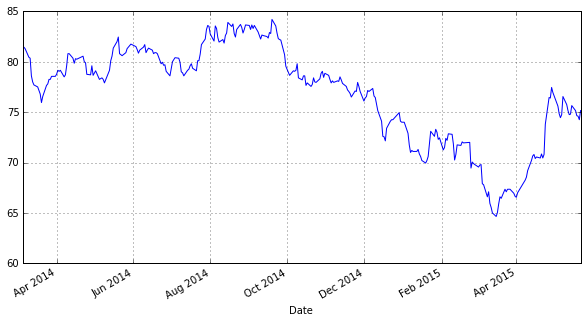

In [66]:
test = tf['Close'] - tf['minv']
tf['Close'].plot(grid=True,figsize=(10,5))

In [6]:
tf['Close'].price

AttributeError: 'Series' object has no attribute 'price'